**PROJET ANALYSE DE DONNEES**
**Exploiter les spectres galactiques extraits du SDSS pour prédire certaines quantités physiques**

Import libraries and load dataset.
We use the SDSS photometric and spectroscopic dataset. The goal is to explore the data, understand the structure, and later build a model to predict the redshift of galaxies and quasars.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load the SDSS dataset
df = pd.read_csv("data/dataset.csv")

Check for missing values.
We verify if any missing values exist in the dataset. Missing data must be treated before any statistical modeling or training.

In [2]:
df.isnull().sum().sum()

np.int64(0)

Display all columns for exploration.
To understand the structure of the dataset and inspect the variables, we make sure that all columns are visible. This helps identify which columns are physical measurements, metadata, or class labels.



In [3]:
# Désactiver toute limite d'affichage de colonnes
pd.set_option("display.max_columns", None)
pd.set_option("display.width", None)  # Largeur illimitée
pd.set_option("display.max_colwidth", None)  # Largeur de chaque cellule

# Afficher les 10 premières lignes avec toutes les colonnes visibles
df.head(20)

,objID,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specObjID,plate,mjd,fiberID,petroRad_u,petroRad_g,petroRad_r,petroRad_i,petroRad_z,petroFlux_u,petroFlux_g,petroFlux_r,petroFlux_i,petroFlux_z,petroR50_u,petroR50_g,petroR50_r,petroR50_i,petroR50_z,psfMag_u,psfMag_g,psfMag_r,psfMag_i,psfMag_z,expAB_u,expAB_g,expAB_r,expAB_i,expAB_z,redshift,class
0,1237648704046760145,198.367594,-0.356065,20.73523,18.85085,17.56961,17.08212,16.70905,752,301,3,366,332185036042299392,295,51985,162,4.617126,5.115590,4.721174,4.684702,5.162075,3.511168,25.518180,81.353650,129.18770,190.042100,1.767043,2.110504,2.036932,2.053084,2.261010,22.04871,20.27086,19.04142,18.61768,18.16375,0.849854,0.809568,0.763818,0.783755,0.719075,0.211824,GALAXY
1,1237648704046760198,198.428206,-0.384406,18.44623,17.23412,16.67523,16.29652,16.07245,752,301,3,366,332189708966717440,295,51985,179,5.532878,5.589859,5.600729,5.354244,5.304190,39.659250,125.105900,213.186100,290.01280,336.886800,2.734408,2.734028,2.720730,2.576809,2.524137,20.34698,19.26615,18.67339,18.33171,18.01228,0.529245,0.550424,0.521570,0.512080,0.483037,0.094445,GALAXY
2,1237648704046760550,198.336859,-0.218801,24.57992,22.96763,22.21550,22.45372,22.82691,752,301,3,366,332194107013228544,295,51985,195,43.766610,2.969290,1.533155,2.969510,43.757050,-0.040059,0.630245,1.160457,0.94205,1.493814,-9999.000000,1.056316,0.807809,1.243051,1.968449,24.25974,23.27652,22.62379,22.95598,22.58121,0.050000,0.150042,0.058668,0.050000,0.050000,3.174457,QSO
3,1237648704046825622,198.462136,-0.219281,19.30241,17.78075,16.90307,16.49114,16.18247,752,301,3,367,332188609455089664,295,51985,175,3.748427,5.855546,5.567865,5.369811,5.497572,16.157750,85.047600,182.182200,258.82040,339.042700,1.568756,2.160283,1.937312,1.818147,1.914507,20.18672,18.81749,17.95659,17.52794,17.23053,0.731522,0.780879,0.822669,0.840207,0.817236,0.121077,GALAXY
4,1237648704046825624,198.466124,-0.254391,20.16626,18.28559,17.22367,16.79652,16.40390,752,301,3,367,332186685309741056,295,51985,168,27.912360,4.671544,5.251847,4.817436,5.149425,13.775220,48.896820,132.852300,193.47120,281.822400,4.686791,2.066747,2.102676,2.048219,2.177020,21.22759,19.41046,18.40081,18.00373,17.58257,0.885392,0.743277,0.761695,0.732215,0.685603,0.138055,GALAXY
5,1237648704046825654,198.493224,-0.256808,19.09543,17.31310,16.35899,15.97224,15.63603,752,301,3,367,332188884332996608,295,51985,176,43.755040,2.868777,2.852538,2.827901,2.873691,25.439210,110.268800,266.156300,377.89710,505.926100,1.837784,1.378804,1.331829,1.306797,1.313619,19.92144,18.18361,17.26347,16.89209,16.56325,0.864026,0.721934,0.673505,0.681313,0.728872,0.138718,GALAXY
6,1237648704046825668,198.501137,-0.350658,19.93487,17.91528,16.87629,16.43629,16.04760,752,301,3,367,332188334577182720,295,51985,174,5.004049,5.202849,5.323276,5.051919,4.989447,9.111118,63.099300,167.760400,244.89990,347.871900,1.890661,2.171092,2.200809,2.088027,2.154626,21.20330,19.24600,18.25201,17.83184,17.43041,0.682248,0.835638,0.818189,0.862818,0.833072,0.120911,GALAXY
7,1237648704046825700,198.539702,-0.323055,20.59683,18.82568,17.65636,17.23815,16.86611,752,301,3,367,332185585798113280,295,51985,164,3.369139,3.106019,2.947591,3.086313,4.476436,4.846580,27.627040,81.833170,121.30410,183.102600,1.322552,1.391850,1.354546,1.380181,1.518395,21.31700,19.66862,18.55658,18.15280,17.82260,0.649986,0.780085,0.836987,0.815756,0.773011,0.176991,GALAXY
8,1237648704046891095,198.701398,-0.412739,19.09171,16.93303,16.00233,15.63252,15.43036,752,301,3,368,332182012385323008,295,51985,151,1.978415,1.582088,1.540958,1.525437,1.482557,22.903200,163.617100,391.359400,548.31160,664.196000,0.966614,0.807051,0.799581,0.800798,0.778099,19.26635,17.16443,16.26453,15.89750,15.76437,0.327707,0.071175,0.104135,0.096623,0.191604,-0.000061,STAR
9,1237648704046891118,198.597214,-0.268027,22.05573,19.20698,17.76519,16.86842,16.38345,752,301,3,368,333353816885848064,296,51984,318,1.959352,1.342583,1.255820,1.263818,1.168554,1.590325,19.834540,74.842530,168.

objID, specObjID, fiberID : ce sont des identifiants uniques, sans signification physique. Ils n’apportent aucune information utile pour l’analyse ou la prédiction.

run, rerun, camcol, field, plate, mjd : ces colonnes décrivent des paramètres techniques liés à l’acquisition des données.
Elles sont pertinentes pour le suivi d'observation astronomique, mais n'ont pas de lien direct avec les propriétés physiques à prédire (redshift, class).

In [4]:
df = df.drop(columns=[
    "objID", "specObjID", "run", "rerun", "camcol", "field", 
    "plate", "mjd", "fiberID"
])

In [5]:
df.head(15)

,ra,dec,u,g,r,i,z,petroRad_u,petroRad_g,petroRad_r,petroRad_i,petroRad_z,petroFlux_u,petroFlux_g,petroFlux_r,petroFlux_i,petroFlux_z,petroR50_u,petroR50_g,petroR50_r,petroR50_i,petroR50_z,psfMag_u,psfMag_g,psfMag_r,psfMag_i,psfMag_z,expAB_u,expAB_g,expAB_r,expAB_i,expAB_z,redshift,class
0,198.367594,-0.356065,20.73523,18.85085,17.56961,17.08212,16.70905,4.617126,5.115590,4.721174,4.684702,5.162075,3.511168,25.518180,81.353650,129.18770,190.042100,1.767043,2.110504,2.036932,2.053084,2.261010,22.04871,20.27086,19.04142,18.61768,18.16375,0.849854,0.809568,0.763818,0.783755,0.719075,0.211824,GALAXY
1,198.428206,-0.384406,18.44623,17.23412,16.67523,16.29652,16.07245,5.532878,5.589859,5.600729,5.354244,5.304190,39.659250,125.105900,213.186100,290.01280,336.886800,2.734408,2.734028,2.720730,2.576809,2.524137,20.34698,19.26615,18.67339,18.33171,18.01228,0.529245,0.550424,0.521570,0.512080,0.483037,0.094445,GALAXY
2,198.336859,-0.218801,24.57992,22.96763,22.21550,22.45372,22.82691,43.766610,2.969290,1.533155,2.969510,43.757050,-0.040059,0.630245,1.160457,0.94205,1.493814,-9999.000000,1.056316,0.807809,1.243051,1.968449,24.25974,23.27652,22.62379,22.95598,22.58121,0.050000,0.150042,0.058668,0.050000,0.050000,3.174457,QSO
3,198.462136,-0.219281,19.30241,17.78075,16.90307,16.49114,16.18247,3.748427,5.855546,5.567865,5.369811,5.497572,16.157750,85.047600,182.182200,258.82040,339.042700,1.568756,2.160283,1.937312,1.818147,1.914507,20.18672,18.81749,17.95659,17.52794,17.23053,0.731522,0.780879,0.822669,0.840207,0.817236,0.121077,GALAXY
4,198.466124,-0.254391,20.16626,18.28559,17.22367,16.79652,16.40390,27.912360,4.671544,5.251847,4.817436,5.149425,13.775220,48.896820,132.852300,193.47120,281.822400,4.686791,2.066747,2.102676,2.048219,2.177020,21.22759,19.41046,18.40081,18.00373,17.58257,0.885392,0.743277,0.761695,0.732215,0.685603,0.138055,GALAXY
5,198.493224,-0.256808,19.09543,17.31310,16.35899,15.97224,15.63603,43.755040,2.868777,2.852538,2.827901,2.873691,25.439210,110.268800,266.156300,377.89710,505.926100,1.837784,1.378804,1.331829,1.306797,1.313619,19.92144,18.18361,17.26347,16.89209,16.56325,0.864026,0.721934,0.673505,0.681313,0.728872,0.138718,GALAXY
6,198.501137,-0.350658,19.93487,17.91528,16.87629,16.43629,16.04760,5.004049,5.202849,5.323276,5.051919,4.989447,9.111118,63.099300,167.760400,244.89990,347.871900,1.890661,2.171092,2.200809,2.088027,2.154626,21.20330,19.24600,18.25201,17.83184,17.43041,0.682248,0.835638,0.818189,0.862818,0.833072,0.120911,GALAXY
7,198.539702,-0.323055,20.59683,18.82568,17.65636,17.23815,16.86611,3.369139,3.106019,2.947591,3.086313,4.476436,4.846580,27.627040,81.833170,121.30410,183.102600,1.322552,1.391850,1.354546,1.380181,1.518395,21.31700,19.66862,18.55658,18.15280,17.82260,0.649986,0.780085,0.836987,0.815756,0.773011,0.176991,GALAXY
8,198.701398,-0.412739,19.09171,16.93303,16.00233,15.63252,15.43036,1.978415,1.582088,1.540958,1.525437,1.482557,22.903200,163.617100,391.359400,548.31160,664.196000,0.966614,0.807051,0.799581,0.800798,0.778099,19.26635,17.16443,16.26453,15.89750,15.76437,0.327707,0.071175,0.104135,0.096623,0.191604,-0.000061,STAR
9,198.597214,-0.268027,22.05573,19.20698,17.76519,16.86842,16.38345,1.959352,1.342583,1.255820,1.263818,1.168554,1.590325,19.834540,74.842530,168.67210,270.152200,0.944337,0.679878,0.641602,0.639893,0.606172,21.96034,19.20511,17.76918,16.87614,16.38058,0.050000,0.650177,0.349977,0.553613,0.399985,0.000124,STAR


### Nettoyage des valeurs aberrantes

Dans le jeu de données SDSS, on peut observer (notamment les magnitudes `psfMag_*`) peuvent contenir la valeur `-9999`, utilisée comme indicateur de données manquantes ou invalides. Ces valeurs sont considérées comme **aberrantes** car elles n'ont aucune signification physique réaliste dans le contexte des magnitudes apparentes.

Afin de garantir la qualité des prédictions, il est indispensable de **supprimer toutes les lignes contenant de telles valeurs** avant l'entraînement du modèle. Ce nettoyage évite d'introduire du bruit ou des biais dans l'apprentissage automatique.


In [6]:
# Supprimer les lignes contenant -9999 dans les colonnes
df = df[~df.isin([-9999, -9999.0, -9999.00000]).any(axis=1)]
df.head(15)

,ra,dec,u,g,r,i,z,petroRad_u,petroRad_g,petroRad_r,petroRad_i,petroRad_z,petroFlux_u,petroFlux_g,petroFlux_r,petroFlux_i,petroFlux_z,petroR50_u,petroR50_g,petroR50_r,petroR50_i,petroR50_z,psfMag_u,psfMag_g,psfMag_r,psfMag_i,psfMag_z,expAB_u,expAB_g,expAB_r,expAB_i,expAB_z,redshift,class
0,198.367594,-0.356065,20.73523,18.85085,17.56961,17.08212,16.70905,4.617126,5.115590,4.721174,4.684702,5.162075,3.511168,25.51818,81.35365,129.18770,190.04210,1.767043,2.110504,2.036932,2.053084,2.261010,22.04871,20.27086,19.04142,18.61768,18.16375,0.849854,0.809568,0.763818,0.783755,0.719075,0.211824,GALAXY
1,198.428206,-0.384406,18.44623,17.23412,16.67523,16.29652,16.07245,5.532878,5.589859,5.600729,5.354244,5.304190,39.659250,125.10590,213.18610,290.01280,336.88680,2.734408,2.734028,2.720730,2.576809,2.524137,20.34698,19.26615,18.67339,18.33171,18.01228,0.529245,0.550424,0.521570,0.512080,0.483037,0.094445,GALAXY
3,198.462136,-0.219281,19.30241,17.78075,16.90307,16.49114,16.18247,3.748427,5.855546,5.567865,5.369811,5.497572,16.157750,85.04760,182.18220,258.82040,339.04270,1.568756,2.160283,1.937312,1.818147,1.914507,20.18672,18.81749,17.95659,17.52794,17.23053,0.731522,0.780879,0.822669,0.840207,0.817236,0.121077,GALAXY
4,198.466124,-0.254391,20.16626,18.28559,17.22367,16.79652,16.40390,27.912360,4.671544,5.251847,4.817436,5.149425,13.775220,48.89682,132.85230,193.47120,281.82240,4.686791,2.066747,2.102676,2.048219,2.177020,21.22759,19.41046,18.40081,18.00373,17.58257,0.885392,0.743277,0.761695,0.732215,0.685603,0.138055,GALAXY
5,198.493224,-0.256808,19.09543,17.31310,16.35899,15.97224,15.63603,43.755040,2.868777,2.852538,2.827901,2.873691,25.439210,110.26880,266.15630,377.89710,505.92610,1.837784,1.378804,1.331829,1.306797,1.313619,19.92144,18.18361,17.26347,16.89209,16.56325,0.864026,0.721934,0.673505,0.681313,0.728872,0.138718,GALAXY
6,198.501137,-0.350658,19.93487,17.91528,16.87629,16.43629,16.04760,5.004049,5.202849,5.323276,5.051919,4.989447,9.111118,63.09930,167.76040,244.89990,347.87190,1.890661,2.171092,2.200809,2.088027,2.154626,21.20330,19.24600,18.25201,17.83184,17.43041,0.682248,0.835638,0.818189,0.862818,0.833072,0.120911,GALAXY
7,198.539702,-0.323055,20.59683,18.82568,17.65636,17.23815,16.86611,3.369139,3.106019,2.947591,3.086313,4.476436,4.846580,27.62704,81.83317,121.30410,183.10260,1.322552,1.391850,1.354546,1.380181,1.518395,21.31700,19.66862,18.55658,18.15280,17.82260,0.649986,0.780085,0.836987,0.815756,0.773011,0.176991,GALAXY
8,198.701398,-0.412739,19.09171,16.93303,16.00233,15.63252,15.43036,1.978415,1.582088,1.540958,1.525437,1.482557,22.903200,163.61710,391.35940,548.31160,664.19600,0.966614,0.807051,0.799581,0.800798,0.778099,19.26635,17.16443,16.26453,15.89750,15.76437,0.327707,0.071175,0.104135,0.096623,0.191604,-0.000061,STAR
9,198.597214,-0.268027,22.05573,19.20698,17.76519,16.86842,16.38345,1.959352,1.342583,1.255820,1.263818,1.168554,1.590325,19.83454,74.84253,168.67210,270.15220,0.944337,0.679878,0.641602,0.639893,0.606172,21.96034,19.20511,17.76918,16.87614,16.38058,0.050000,0.650177,0.349977,0.553613,0.399985,0.000124,STAR
11,199.178682,-0.369682,19.95724,18.16895,17.30886,16.92909,16.62785,3.748447,2.512196,2.513934,2.322539,13.609110,11.422110,50.76727,113.13300,157.57180,208.78400,1.351979,1.182613,1.184190,1.076794,1.119083,20.56723,18.72800,17.94220,17.62918,17.32328,0.657417,0.731865,0.725864,0.719094,0.761240,0.082606,GALAXY


## Répartition des classes d'objets célestes

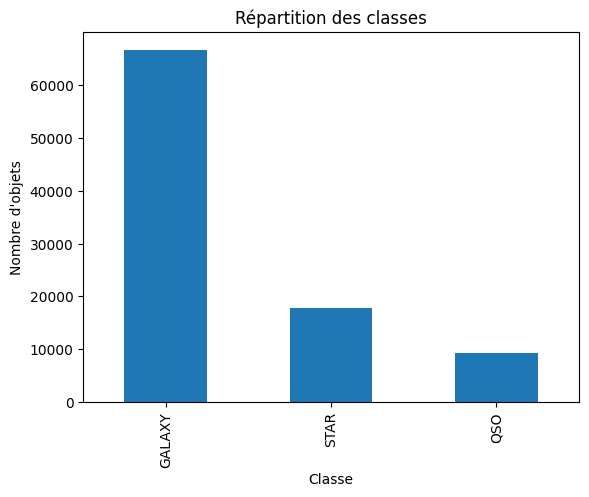

In [7]:

df["class"].value_counts().plot(kind="bar", title="Répartition des classes")
plt.xlabel("Classe")
plt.ylabel("Nombre d'objets")
plt.show()

Le graphique ci-dessous montre la répartition des classes présentes dans notre jeu de données (`class`).  
On observe une **forte majorité de galaxies (GALAXY)**, suivies par des étoiles (`STAR`) et enfin des quasars (`QSO`).  

Ce **déséquilibre important** doit être pris en compte si l'on construit un modèle de classification, au risque de biaiser les prédictions en faveur de la classe dominante.

| Classe | Nombre d’exemples |
|--------|--------------------|
| GALAXY | ~70 000            |
| STAR   | ~20 000            |
| QSO    | ~10 000            |


### Distribution du redshift


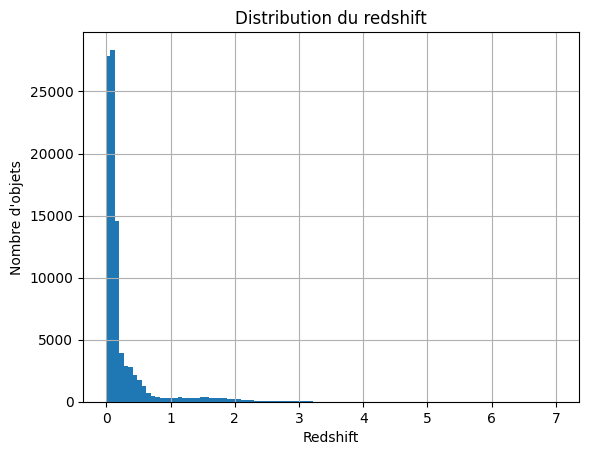

In [8]:
df["redshift"].hist(bins=100)
plt.title("Distribution du redshift")
plt.xlabel("Redshift")
plt.ylabel("Nombre d'objets")
plt.show()


Le graphique ci-dessus montre la distribution de la variable `redshift`, qui mesure le décalage spectral des objets célestes (lié à leur distance et à l’expansion de l’univers).

On observe une **forte concentration autour de 0** : la majorité des objets sont proches de la Terre.  
Quelques cas rares présentent un redshift élevé (souvent > 2), typiques de **quasars très lointains**.

#### Conséquences pour l’analyse :
- La régression risque d’être **biaisée vers les petites valeurs** si l’on ne traite pas ce déséquilibre.
- Il peut être judicieux de **transformer le redshift** (ex. logarithme, normalisation) ou de **filtrer les extrêmes**, en fonction de l’objectif du modèle.


### Distribution du redshift par classe

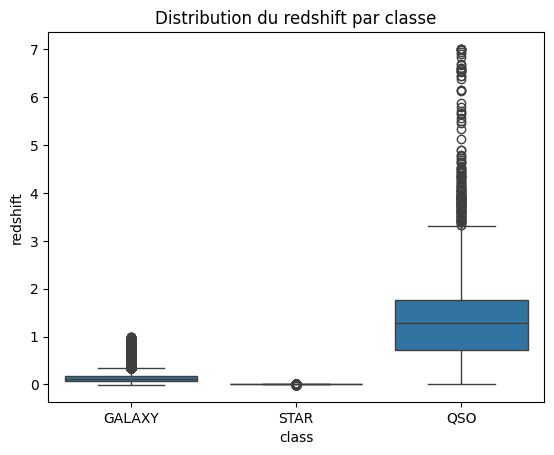

In [9]:
sns.boxplot(x="class", y="redshift", data=df)
plt.title("Distribution du redshift par classe")
plt.show()

Ce boxplot compare la distribution du `redshift` selon les trois classes d’objets célestes (`GALAXY`, `STAR`, `QSO`) :

- Les **étoiles (STAR)** ont un redshift quasi nul, ce qui est attendu puisqu’elles appartiennent à notre galaxie.
- Les **galaxies (GALAXY)** présentent un redshift modéré, généralement inférieur à 0.5.
- Les **quasars (QSO)** ont des redshifts nettement plus élevés, souvent supérieurs à 1, avec une large variabilité. Ce sont des objets très lointains.

#### Interprétation :
- Ce graphique confirme que le `redshift` est une **variable discriminante** entre les classes.
- Il justifie le **filtrage des étoiles** dans un modèle de régression du redshift, puisqu’elles n’apportent pas de diversité utile (toujours proche de 0).



### Matrice de corrélation

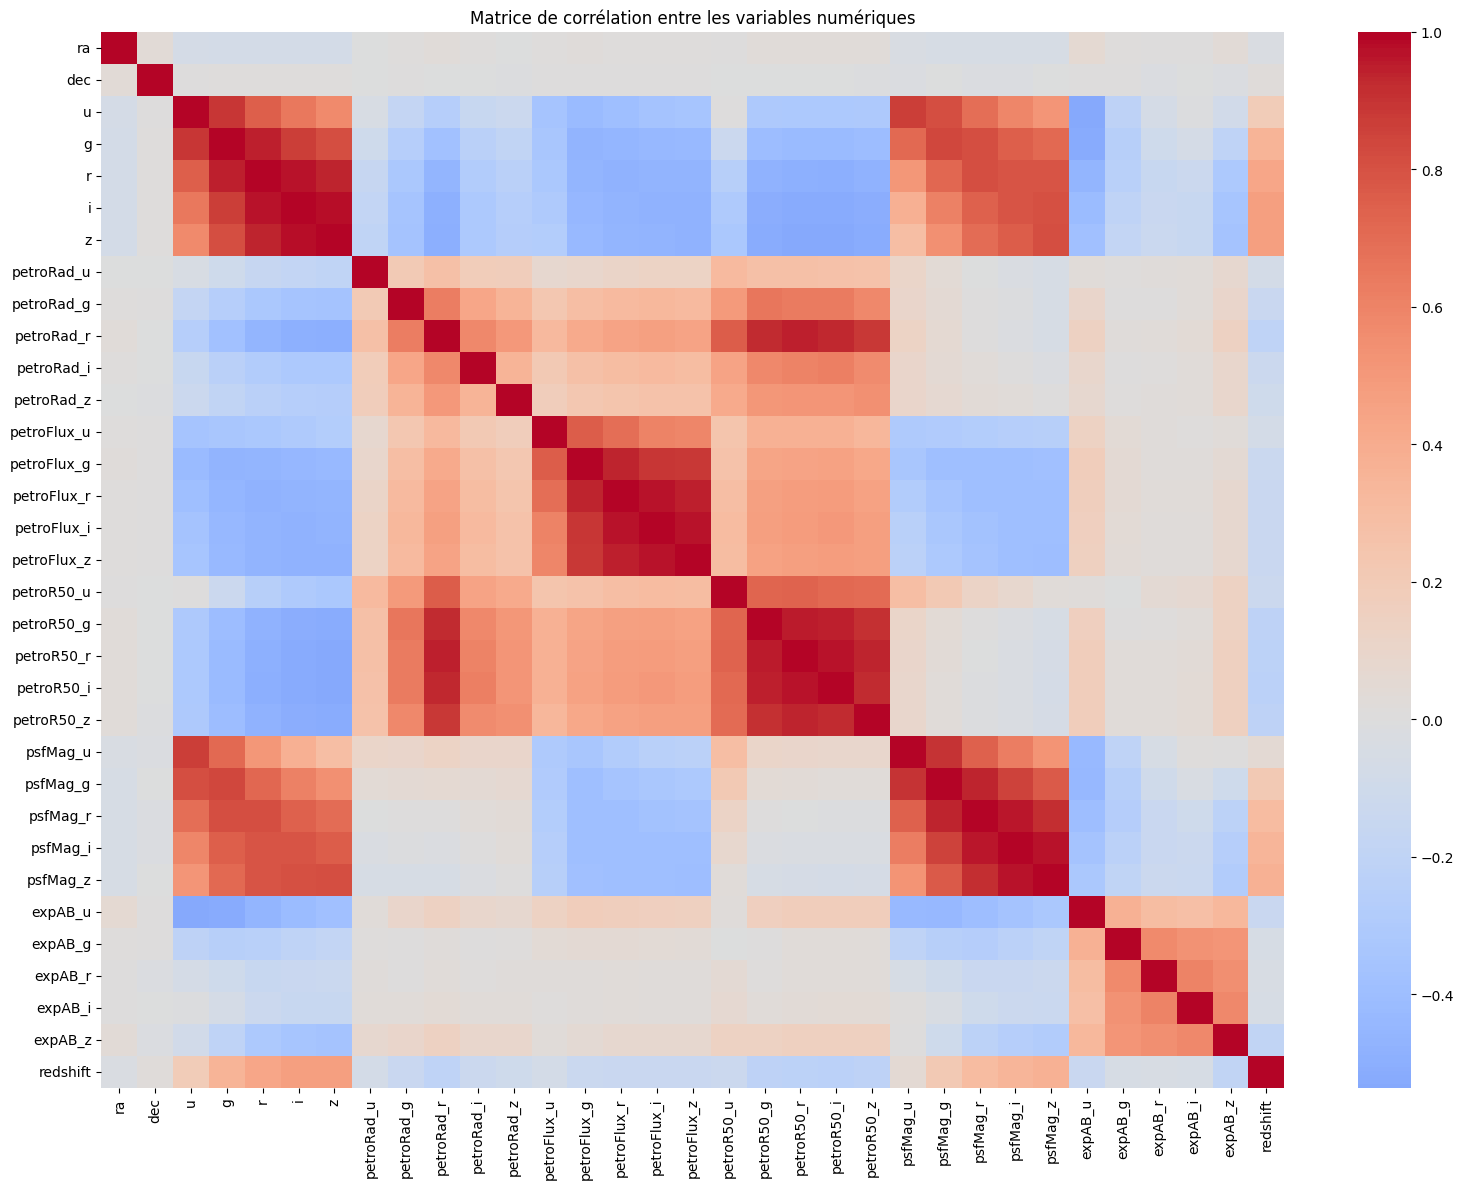

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# On ne garde que les colonnes numériques
numeric_df = df.select_dtypes(include=["float64", "int64"])

# Calcul de la matrice de corrélation
corr_matrix = numeric_df.corr()

# Affichage de la heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, cmap="coolwarm", annot=False, center=0)
plt.title("Matrice de corrélation entre les variables numériques")
plt.tight_layout()
plt.show()


Cette matrice de corrélation, calculée uniquement sur les variables physiques (après suppression des colonnes techniques), met en évidence plusieurs points clés :
- Les magnitudes (`u`, `g`, `r`, `i`, `z`) et les flux (`petroFlux_*`) sont fortement corrélés entre eux, ce qui confirme leur redondance partielle.
- Le `redshift` n’est fortement corrélé à aucune variable individuelle, ce qui suggère que la relation entre les caractéristiques physiques et le décalage spectral est complexe et non linéaire.
- Les variables les plus corrélées négativement à `redshift` sont `petroRad_r`, `petroFlux_i`, `petroFlux_g`, `psfMag_r`, ce qui justifie leur utilisation dans un modèle de régression.
- Les variables de forme (`expAB_*`) sont très corrélées entre elles, mais peu liées au redshift — leur utilité sera à vérifier empiriquement lors de l'entraînement.

Cette analyse nous permet de mieux sélectionner les variables pertinentes et d’envisager, si besoin, des techniques de réduction de dimension ou de régularisation pour éviter les redondances.


### Corrélation entre les variables et le redshift


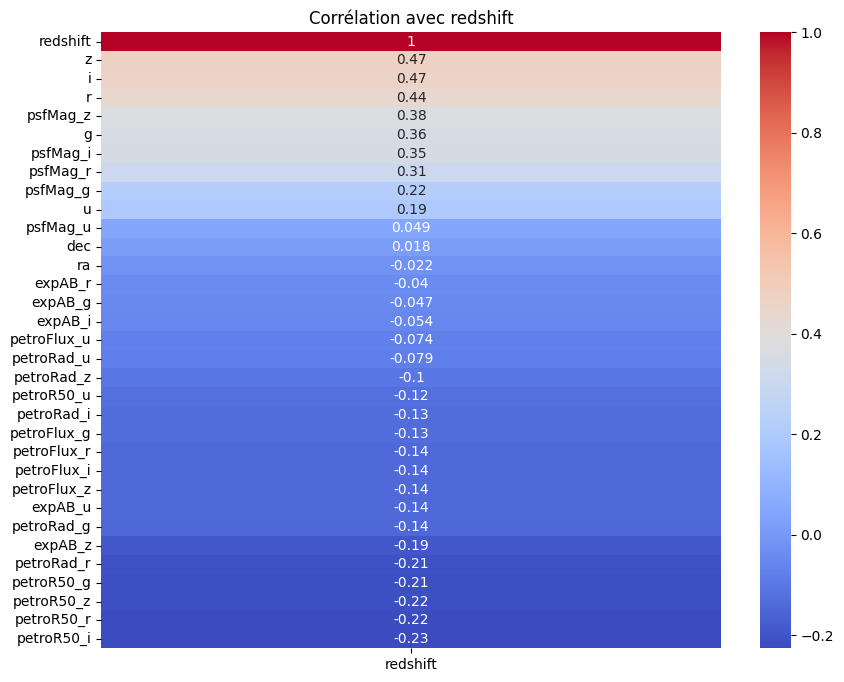

In [11]:
corr = df.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(corr[["redshift"]].sort_values("redshift", ascending=False), annot=True, cmap="coolwarm")
plt.title("Corrélation avec redshift")
plt.show()


Cette heatmap montre la corrélation linéaire de chaque variable avec le `redshift`. Les valeurs proches de +1 indiquent une forte corrélation positive, tandis que celles proches de -1 indiquent une corrélation négative.

#### Principales observations :
- Les variables **`z`**, **`i`** et **`r`** (magnitudes classiques) sont les **plus corrélées positivement** avec le redshift (≈ 0.44 à 0.47).
- Les **magnitudes PSF** sont aussi corrélées, mais un peu moins (max ≈ 0.38 pour `psfMag_z`).
- Les autres variables (flux, rayons, positions, excentricité…) montrent une **corrélation faible voire négative**, suggérant qu'elles sont moins informatives pour la prédiction du redshift.

### Nuage de points

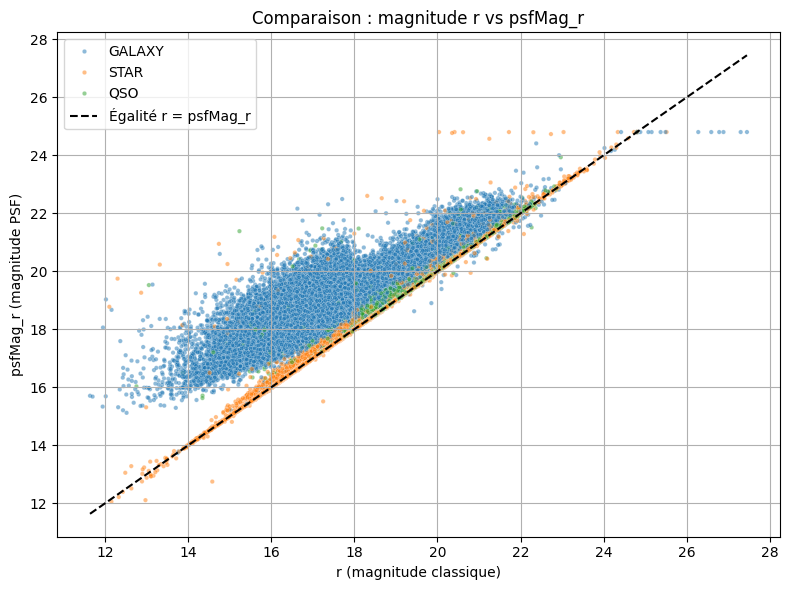

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))

# Nuage de points : r (modelMag) vs psfMag_r
sns.scatterplot(
    data=df,
    x="r",
    y="psfMag_r",
    hue="class",
    alpha=0.5,
    s=10
)

# Ligne diagonale : y = x
min_val = min(df["r"].min(), df["psfMag_r"].min())
max_val = max(df["r"].max(), df["psfMag_r"].max())
plt.plot([min_val, max_val], [min_val, max_val], 'k--', label="Égalité r = psfMag_r")

# Titres et légende
plt.title("Comparaison : magnitude r vs psfMag_r")
plt.xlabel("r (magnitude r)")
plt.ylabel("psfMag_r (magnitude PSF)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Les diagrammes de dispersion précédents comparent directement, pour chaque objet, les magnitudes classiques `r` avec les magnitudes PSF `psfMag_r`, en colorant les points par classe (`GALAXY`, `STAR`, `QSO`). Une diagonale d’égalité (`r = psfMag_r`) est tracée pour faciliter la comparaison.

On observe que :
- Les **étoiles (`STAR`)** et les **quasars (`QSO`)** sont alignés très précisément le long de cette diagonale. Cela montre que les magnitudes PSF capturent très bien leur flux lumineux. Ces objets sont ponctuels (non étendus), donc leur lumière est bien modélisée par la PSF.
- Les **galaxies (`GALAXY`)**, au contraire, se situent **au-dessus de la diagonale**, ce qui indique que `psfMag_r` est **plus élevée** (donc **moins lumineuse**) que `r`. Cela signifie que la PSF **sous-estime la luminosité** des galaxies, car elle ignore la lumière diffusée en périphérie de ces objets étendus.

Ces visualisations confirment que :
- Les magnitudes **`psfMag_*`** sont le meilleur choix pour les **étoiles** et **quasars**, car elles sont optimisées pour les objets ponctuels.
- Les magnitudes classiques (`r`, `g`, etc.), souvent dérivées de `modelMag_*`, sont plus adaptées aux **galaxies**, car elles intègrent mieux le flux total.
- Le choix des variables dépend donc de la nature de l’objet : **ponctuel ou étendu**.

> “For galaxies, modelMag usually provides the best available SDSS colors.”  
> “For distant quasars, which are unresolved, psfMag is unbiased and optimal.”  
> “Again, these objects are unresolved, and psfMag is the optimal measure of their brightness.”  
> Source: [https://www.sdss.org/dr12/algorithms/magnitudes/](https://www.sdss.org/dr12/algorithms/magnitudes/)



### Choix des magnitudes en fonction du type d'objet

- Pour les **étoiles** (`STAR`) et les **quasars** (`QSO`), nous utilisons les magnitudes `psfMag_*`, car ce sont des objets ponctuels (unresolved sources). La PSF est optimisée pour ce type de forme, ce qui permet d’obtenir une mesure plus fiable de leur luminosité.

- Pour les **galaxies** (`GALAXY`), nous utilisons les magnitudes classiques `u`, `g`, `r`, `i`, `z` (souvent dérivées de `modelMag_*`), car ces objets sont étendus. Les magnitudes PSF sous-estiment leur flux total en négligeant la lumière diffusée à la périphérie.

Ce choix permet une modélisation plus cohérente et physiquement fondée selon le type d’objet analysé.

In [19]:
# Séparer le DataFrame en deux groupes selon la classe
df_star = df[df["class"] == "STAR"]
df_qso = df[df["class"] == "QSO"]
df_galaxy = df[df["class"] == "GALAXY"]

# Pour les étoiles : utiliser les magnitudes PSF
features_star= ["psfMag_u", "psfMag_g", "psfMag_r", "psfMag_i", "psfMag_z"]
X_star = df_star[features_star]
y_star = df_star["redshift"]

# Pour les étoiles et QSOs : utiliser les magnitudes PSF
features_qso = ["psfMag_u", "psfMag_g", "psfMag_r", "psfMag_i", "psfMag_z"]
X_qso = df_qso[features_qso]
y_qso = df_qso["redshift"]


# Pour les galaxies : utiliser les magnitudes classiques (g, r, i, z)
features_galaxy = ["u", "g", "r", "i", "z"]
X_galaxy = df_galaxy[features_galaxy]
y_galaxy = df_galaxy["redshift"]

# Résumé des tailles de chaque dataset préparé
{
    "X_star": X_star.shape,
    "y_star": y_star.shape,
    "X_galaxy": X_galaxy.shape,
    "y_galaxy": y_galaxy.shape,
    "X_qso": X_qso.shape,
    "y_qso": y_qso.shape
}


{'X_star': (17755, 5),
 'y_star': (17755,),
 'X_galaxy': (66662, 5),
 'y_galaxy': (66662,),
 'X_qso': (9321, 5),
 'y_qso': (9321,)}

In [20]:
# Séparation train/test pour STAR, QSO et GALAXY
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(
    X_star, y_star, test_size=0.2, random_state=42
)

X_train_q, X_test_q, y_train_q, y_test_q = train_test_split(
    X_qso, y_qso, test_size=0.2, random_state=42
)

X_train_g, X_test_g, y_train_g, y_test_g = train_test_split(
    X_galaxy, y_galaxy, test_size=0.2, random_state=42
)

In [21]:
# Entraînement du modèle
model_s = RandomForestRegressor(n_estimators=100, random_state=42)
model_s.fit(X_train_s, y_train_s)

model_q = RandomForestRegressor(n_estimators=100, random_state=42)
model_q.fit(X_train_q, y_train_q)

model_g = RandomForestRegressor(n_estimators=100, random_state=42)
model_g.fit(X_train_g, y_train_g)



RandomForestRegressor(random_state=42)

In [22]:
# Prédiction
y_pred_s = model_s.predict(X_test_s)
y_pred_g = model_g.predict(X_test_g)
y_pred_q = model_q.predict(X_test_q)


In [23]:


# Évaluation
print("\nRésultats pour GALAXY :")
print("MSE :", mean_squared_error(y_test_g, y_pred_g))
print("R² :", r2_score(y_test_g, y_pred_g))

print("Résultats pour STAR:")
print("MSE :", mean_squared_error(y_test_s, y_pred_s))
print("R² :", r2_score(y_test_s, y_pred_s))

print("Résultats pour QSO:")
print("MSE :", mean_squared_error(y_test_q, y_pred_q))
print("R² :", r2_score(y_test_q, y_pred_q))



Résultats pour GALAXY :
MSE : 0.0018041347529267854
R² : 0.9034612371971326
Résultats pour STAR:
MSE : 2.2184374973607857e-07
R² : -0.08135069032246833
Résultats pour QSO:
MSE : 0.33586251163928976
R² : 0.46087693522890594
